In [1]:
import pandas as pd
import numpy as np

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded=files.upload()

Saving anime.csv to anime.csv


In [3]:
am=pd.read_csv('anime.csv')

In [4]:
am

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


# **APPLYING EDA**

In [5]:
am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
am.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
am.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [8]:
am[am.duplicated()]   #AS THERE IS NO DUPLICATES VALUE

,anime_id,name,genre,type,episodes,rating,members


In [9]:
#number of unique users in the dataset
len(am.anime_id	.unique())

12294

In [10]:
am['anime_id'].value_counts()

anime_id
32281    1
30404    1
26013    1
26017    1
15787    1
        ..
12455    1
28789    1
373      1
2089     1
26081    1
Name: count, Length: 12294, dtype: int64

In [11]:
len(am.name.unique())

12292

In [12]:
am['name'].value_counts()  #COUNTS FOR THE NAME OF ANIME IN THE DATA

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64

In [14]:
am['rating'].value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

<Axes: xlabel='rating'>

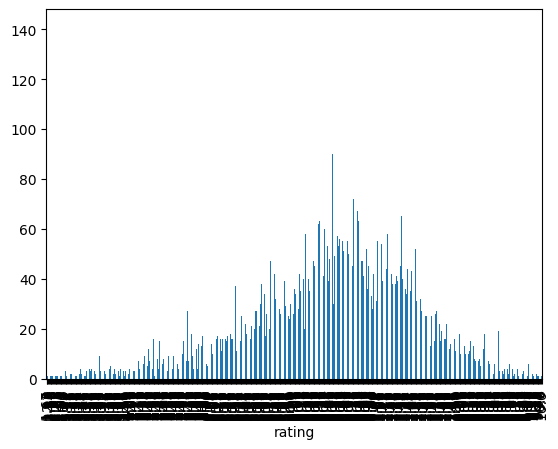

In [17]:
am['rating'].value_counts().sort_index().plot(kind='bar')

In [24]:
am.drop(['name','genre'],axis=1,inplace=True)   #DROP THE COLUMNS

In [25]:
am

,anime_id,type,episodes,rating,members
0,32281,Movie,1,9.37,200630
1,5114,TV,64,9.26,793665
2,28977,TV,51,9.25,114262
3,9253,TV,24,9.17,673572
4,9969,TV,51,9.16,151266
...,...,...,...,...,...
12289,9316,OVA,1,4.15,211
12290,5543,OVA,1,4.28,183
12291,5621,OVA,4,4.88,219
12292,6133,OVA,1,4.98,175


In [28]:
anime=pd.get_dummies(am,columns=['type'],dtype=int)     #CONVERTING CATEGORICAL INTO NUMERIC DATA

In [55]:
anime

,anime_id,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,1.0,9.37,200630,1,0,0,0,0,0
1,5114,64.0,9.26,793665,0,0,0,0,0,1
2,28977,51.0,9.25,114262,0,0,0,0,0,1
3,9253,24.0,9.17,673572,0,0,0,0,0,1
4,9969,51.0,9.16,151266,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
12289,9316,1.0,4.15,211,0,0,0,1,0,0
12290,5543,1.0,4.28,183,0,0,0,1,0,0
12291,5621,4.0,4.88,219,0,0,0,1,0,0
12292,6133,1.0,4.98,175,0,0,0,1,0,0


In [31]:
anime.info()  # BASIC INFORMATION ABOUT DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      12294 non-null  int64  
 1   episodes      12294 non-null  object 
 2   rating        12064 non-null  float64
 3   members       12294 non-null  int64  
 4   type_Movie    12294 non-null  int64  
 5   type_Music    12294 non-null  int64  
 6   type_ONA      12294 non-null  int64  
 7   type_OVA      12294 non-null  int64  
 8   type_Special  12294 non-null  int64  
 9   type_TV       12294 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 960.6+ KB


In [33]:
anime['episodes'].unique()   # TO FIND UNIQUE VALUE IN THE EPISODES, SO THAT DATA TYPE WOULD GET CORRECT

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [35]:
anime[anime['episodes']=='Unknown']     # HERE, ALL THE DATA WHICH BELONGS TO UNKNOWN

,anime_id,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
74,21,Unknown,8.58,504862,0,0,0,0,0,1
252,235,Unknown,8.25,114702,0,0,0,0,0,1
615,1735,Unknown,7.94,533578,0,0,0,0,0,1
991,966,Unknown,7.73,26267,0,0,0,0,0,1
1021,33157,Unknown,7.72,5400,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
12265,34361,Unknown,NaN,205,0,0,0,1,0,0
12274,34492,Unknown,NaN,392,0,0,0,1,0,0
12280,34312,Unknown,NaN,240,0,0,0,1,0,0
12282,34388,Unknown,NaN,195,0,0,0,1,0,0


In [36]:
# TO CONVERT INVALID INTEGER INTO MISSING VALUE
anime['episodes']=pd.to_numeric(anime['episodes'],errors='coerce')

In [38]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      12294 non-null  int64  
 1   episodes      11954 non-null  float64
 2   rating        12064 non-null  float64
 3   members       12294 non-null  int64  
 4   type_Movie    12294 non-null  int64  
 5   type_Music    12294 non-null  int64  
 6   type_ONA      12294 non-null  int64  
 7   type_OVA      12294 non-null  int64  
 8   type_Special  12294 non-null  int64  
 9   type_TV       12294 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 960.6 KB


In [40]:
anime.isnull().sum()   #AS THERE ARE NULL VALUES EXIST IN THE DATA

anime_id          0
episodes        340
rating          230
members           0
type_Movie        0
type_Music        0
type_ONA          0
type_OVA          0
type_Special      0
type_TV           0
dtype: int64

In [41]:
# AS WE CAN SEE THE MISSING VALUES ARE VERY LESS IN PERCENTAGE SO WE CAN REMOVE THEM
print('The % of missing values in episodes is', (anime['episodes'].isnull().sum()/len(anime))*100)
print('The % of missing values in rating is', (anime['rating'].isnull().sum()/len(anime))*100)

The % of missing values in episodes is 2.7655767040832924
The % of missing values in rating is 1.8708312998210508


In [56]:
anime.dropna()

,anime_id,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,1.0,9.37,200630,1,0,0,0,0,0
1,5114,64.0,9.26,793665,0,0,0,0,0,1
2,28977,51.0,9.25,114262,0,0,0,0,0,1
3,9253,24.0,9.17,673572,0,0,0,0,0,1
4,9969,51.0,9.16,151266,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
12289,9316,1.0,4.15,211,0,0,0,1,0,0
12290,5543,1.0,4.28,183,0,0,0,1,0,0
12291,5621,4.0,4.88,219,0,0,0,1,0,0
12292,6133,1.0,4.98,175,0,0,0,1,0,0


In [39]:
anime.corr()

,anime_id,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
anime_id,1.000000,-0.072945,-0.284625,-0.080071,0.035623,0.148865,0.191668,-0.145017,0.090457,-0.121855
episodes,-0.072945,1.000000,0.088761,0.056307,-0.118877,-0.049477,-0.027310,-0.130235,-0.084481,0.328206
rating,-0.284625,0.088761,1.000000,0.387979,-0.073611,-0.176963,-0.193371,-0.058794,0.019371,0.275953
members,-0.080071,0.056307,0.387979,1.000000,-0.068345,-0.062157,-0.060595,-0.133843,-0.075340,0.299561
type_Movie,0.035623,-0.118877,-0.073611,-0.068345,1.000000,-0.098783,-0.115634,-0.294981,-0.193037,-0.324179
type_Music,0.148865,-0.049477,-0.176963,-0.062157,-0.098783,1.000000,-0.048386,-0.123432,-0.080774,-0.135649
type_ONA,0.191668,-0.027310,-0.193371,-0.060595,-0.115634,-0.048386,1.000000,-0.144487,-0.094553,-0.158788
type_OVA,-0.145017,-0.130235,-0.058794,-0.133843,-0.294981,-0.123432,-0.144487,1.000000,-0.241204,-0.405068
type_Special,0.090457,-0.084481,0.019371,-0.075340,-0.193037,-0.080774,-0.094553,-0.241204,1.000000,-0.265079
type_TV,-0.121855,0.328206,0.275953,0.299561,-0.324179,-0.135649,-0.158788,-0.405068,-0.265079,1.000000


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

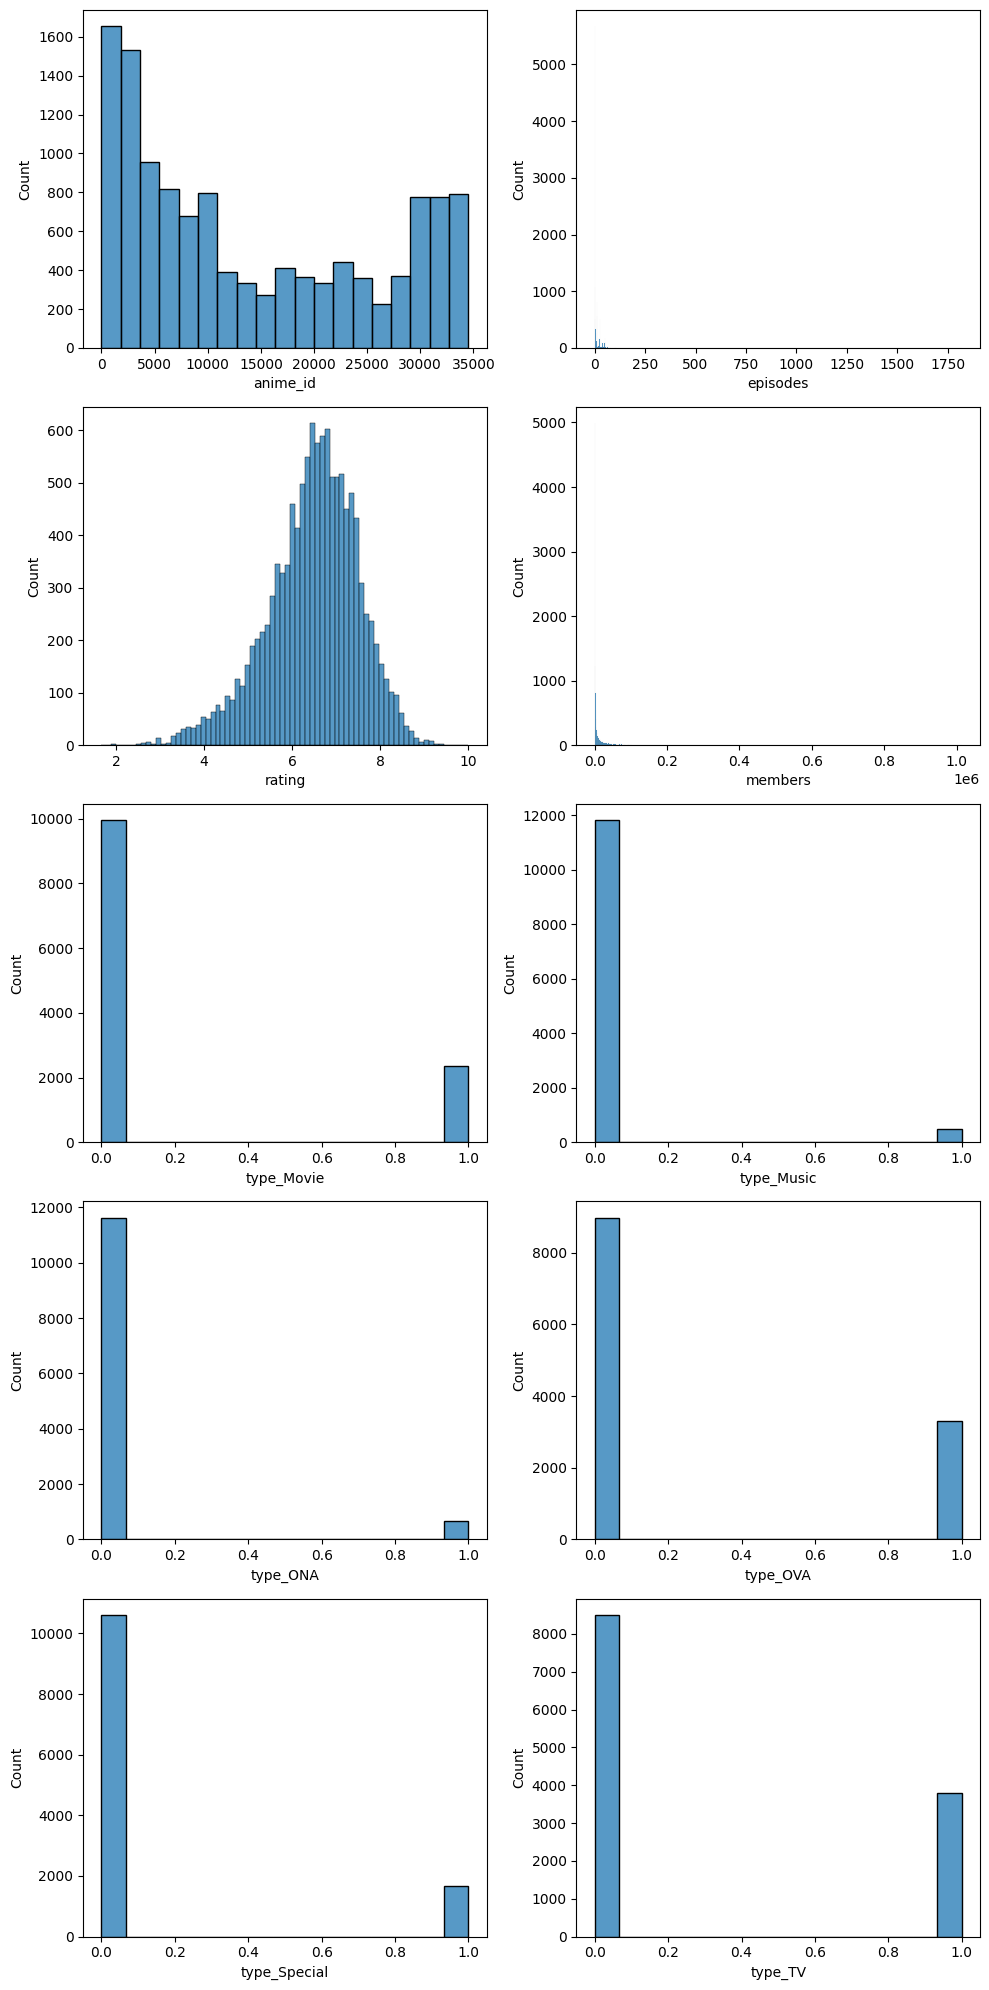

In [43]:
# PLOTTING HISTOGRAM ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(5, 2, figsize=(10, 20))

sns.histplot(anime['anime_id'], ax = ax[0,0])
sns.histplot(anime['episodes'], ax = ax[0,1])
sns.histplot(anime['rating'], ax = ax[1,0])
sns.histplot(anime['members'], ax = ax[1,1])
sns.histplot(anime['type_Movie'], ax = ax[2,0])
sns.histplot(anime['type_Music'], ax = ax[2,1])
sns.histplot(anime['type_ONA'], ax = ax[3,0])
sns.histplot(anime['type_OVA'], ax = ax[3,1])
sns.histplot(anime['type_Special'], ax = ax[4,0])
sns.histplot(anime['type_TV'], ax = ax[4,1])

plt.tight_layout()

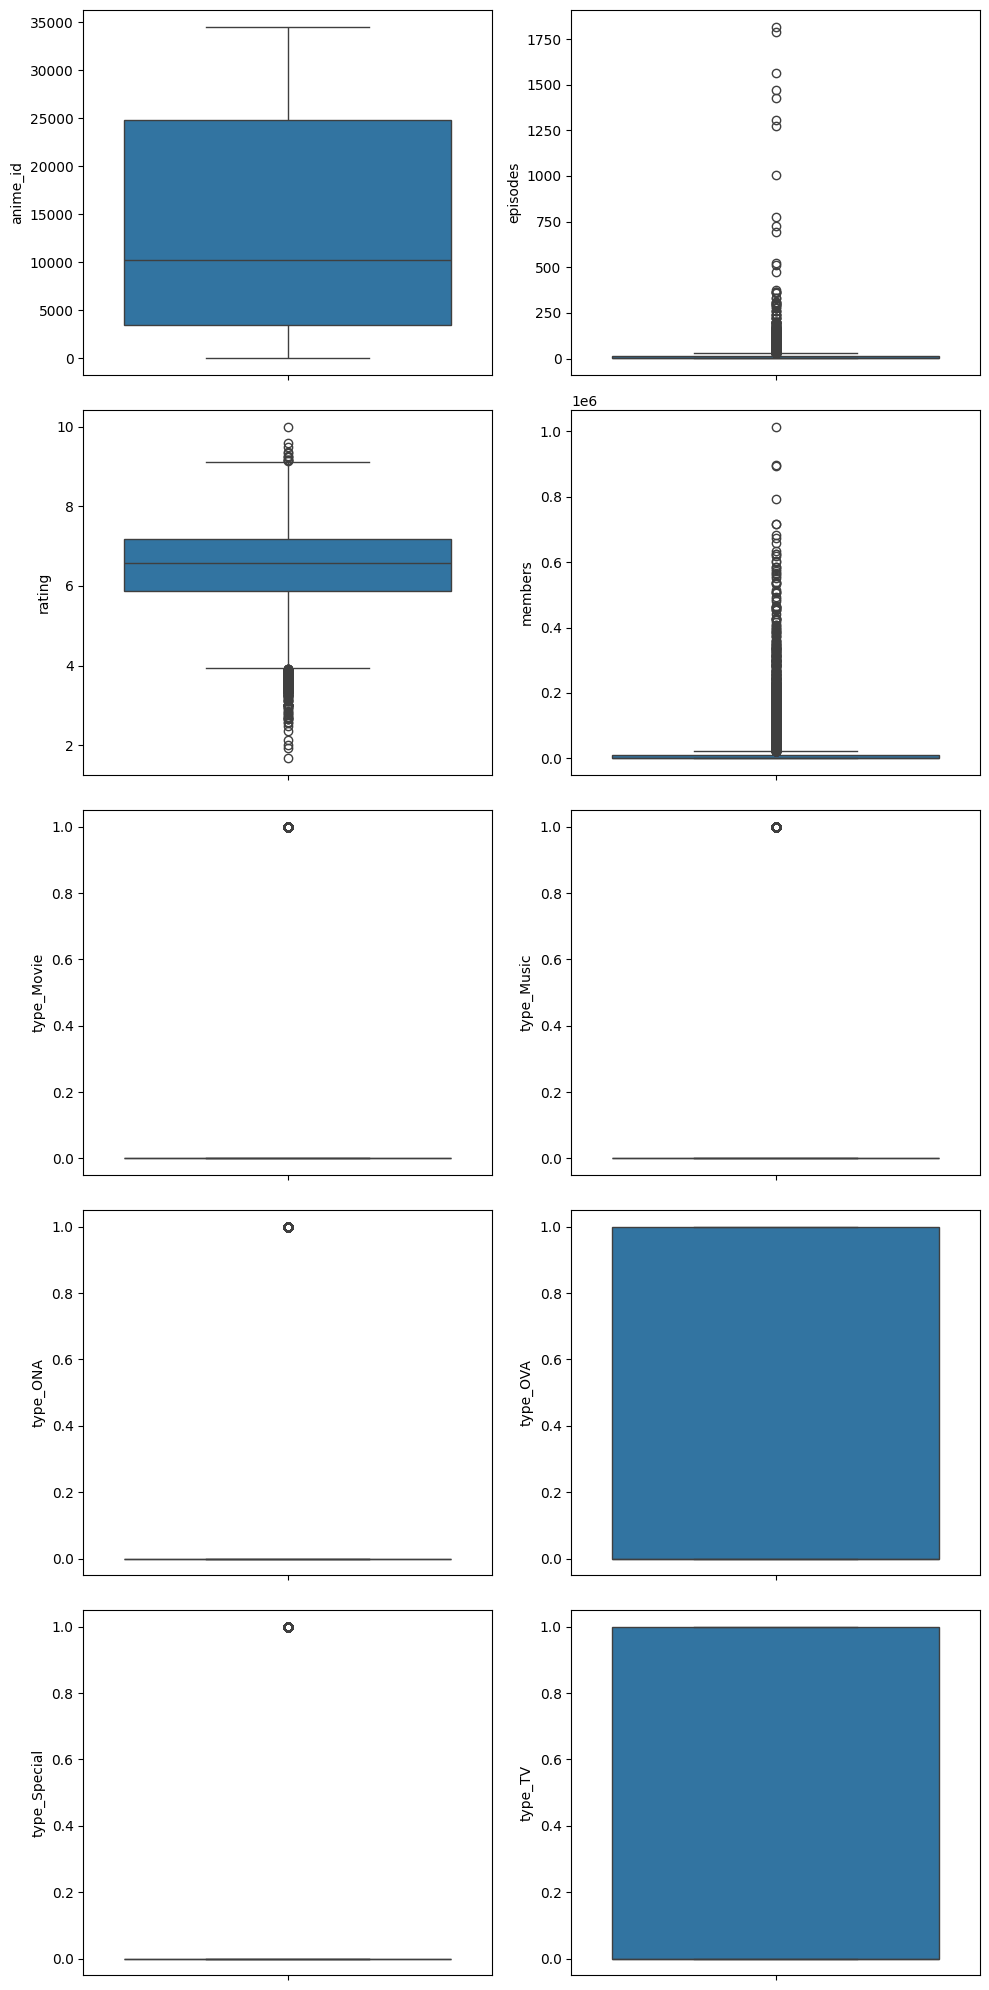

In [44]:
# PLOTTING BOXPLOT ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(5, 2, figsize=(10, 20))

sns.boxplot(anime['anime_id'], ax = ax[0,0])
sns.boxplot(anime['episodes'], ax = ax[0,1])
sns.boxplot(anime['rating'], ax = ax[1,0])
sns.boxplot(anime['members'], ax = ax[1,1])
sns.boxplot(anime['type_Movie'], ax = ax[2,0])
sns.boxplot(anime['type_Music'], ax = ax[2,1])
sns.boxplot(anime['type_ONA'], ax = ax[3,0])
sns.boxplot(anime['type_OVA'], ax = ax[3,1])
sns.boxplot(anime['type_Special'], ax = ax[4,0])
sns.boxplot(anime['type_TV'], ax = ax[4,1])

plt.tight_layout()

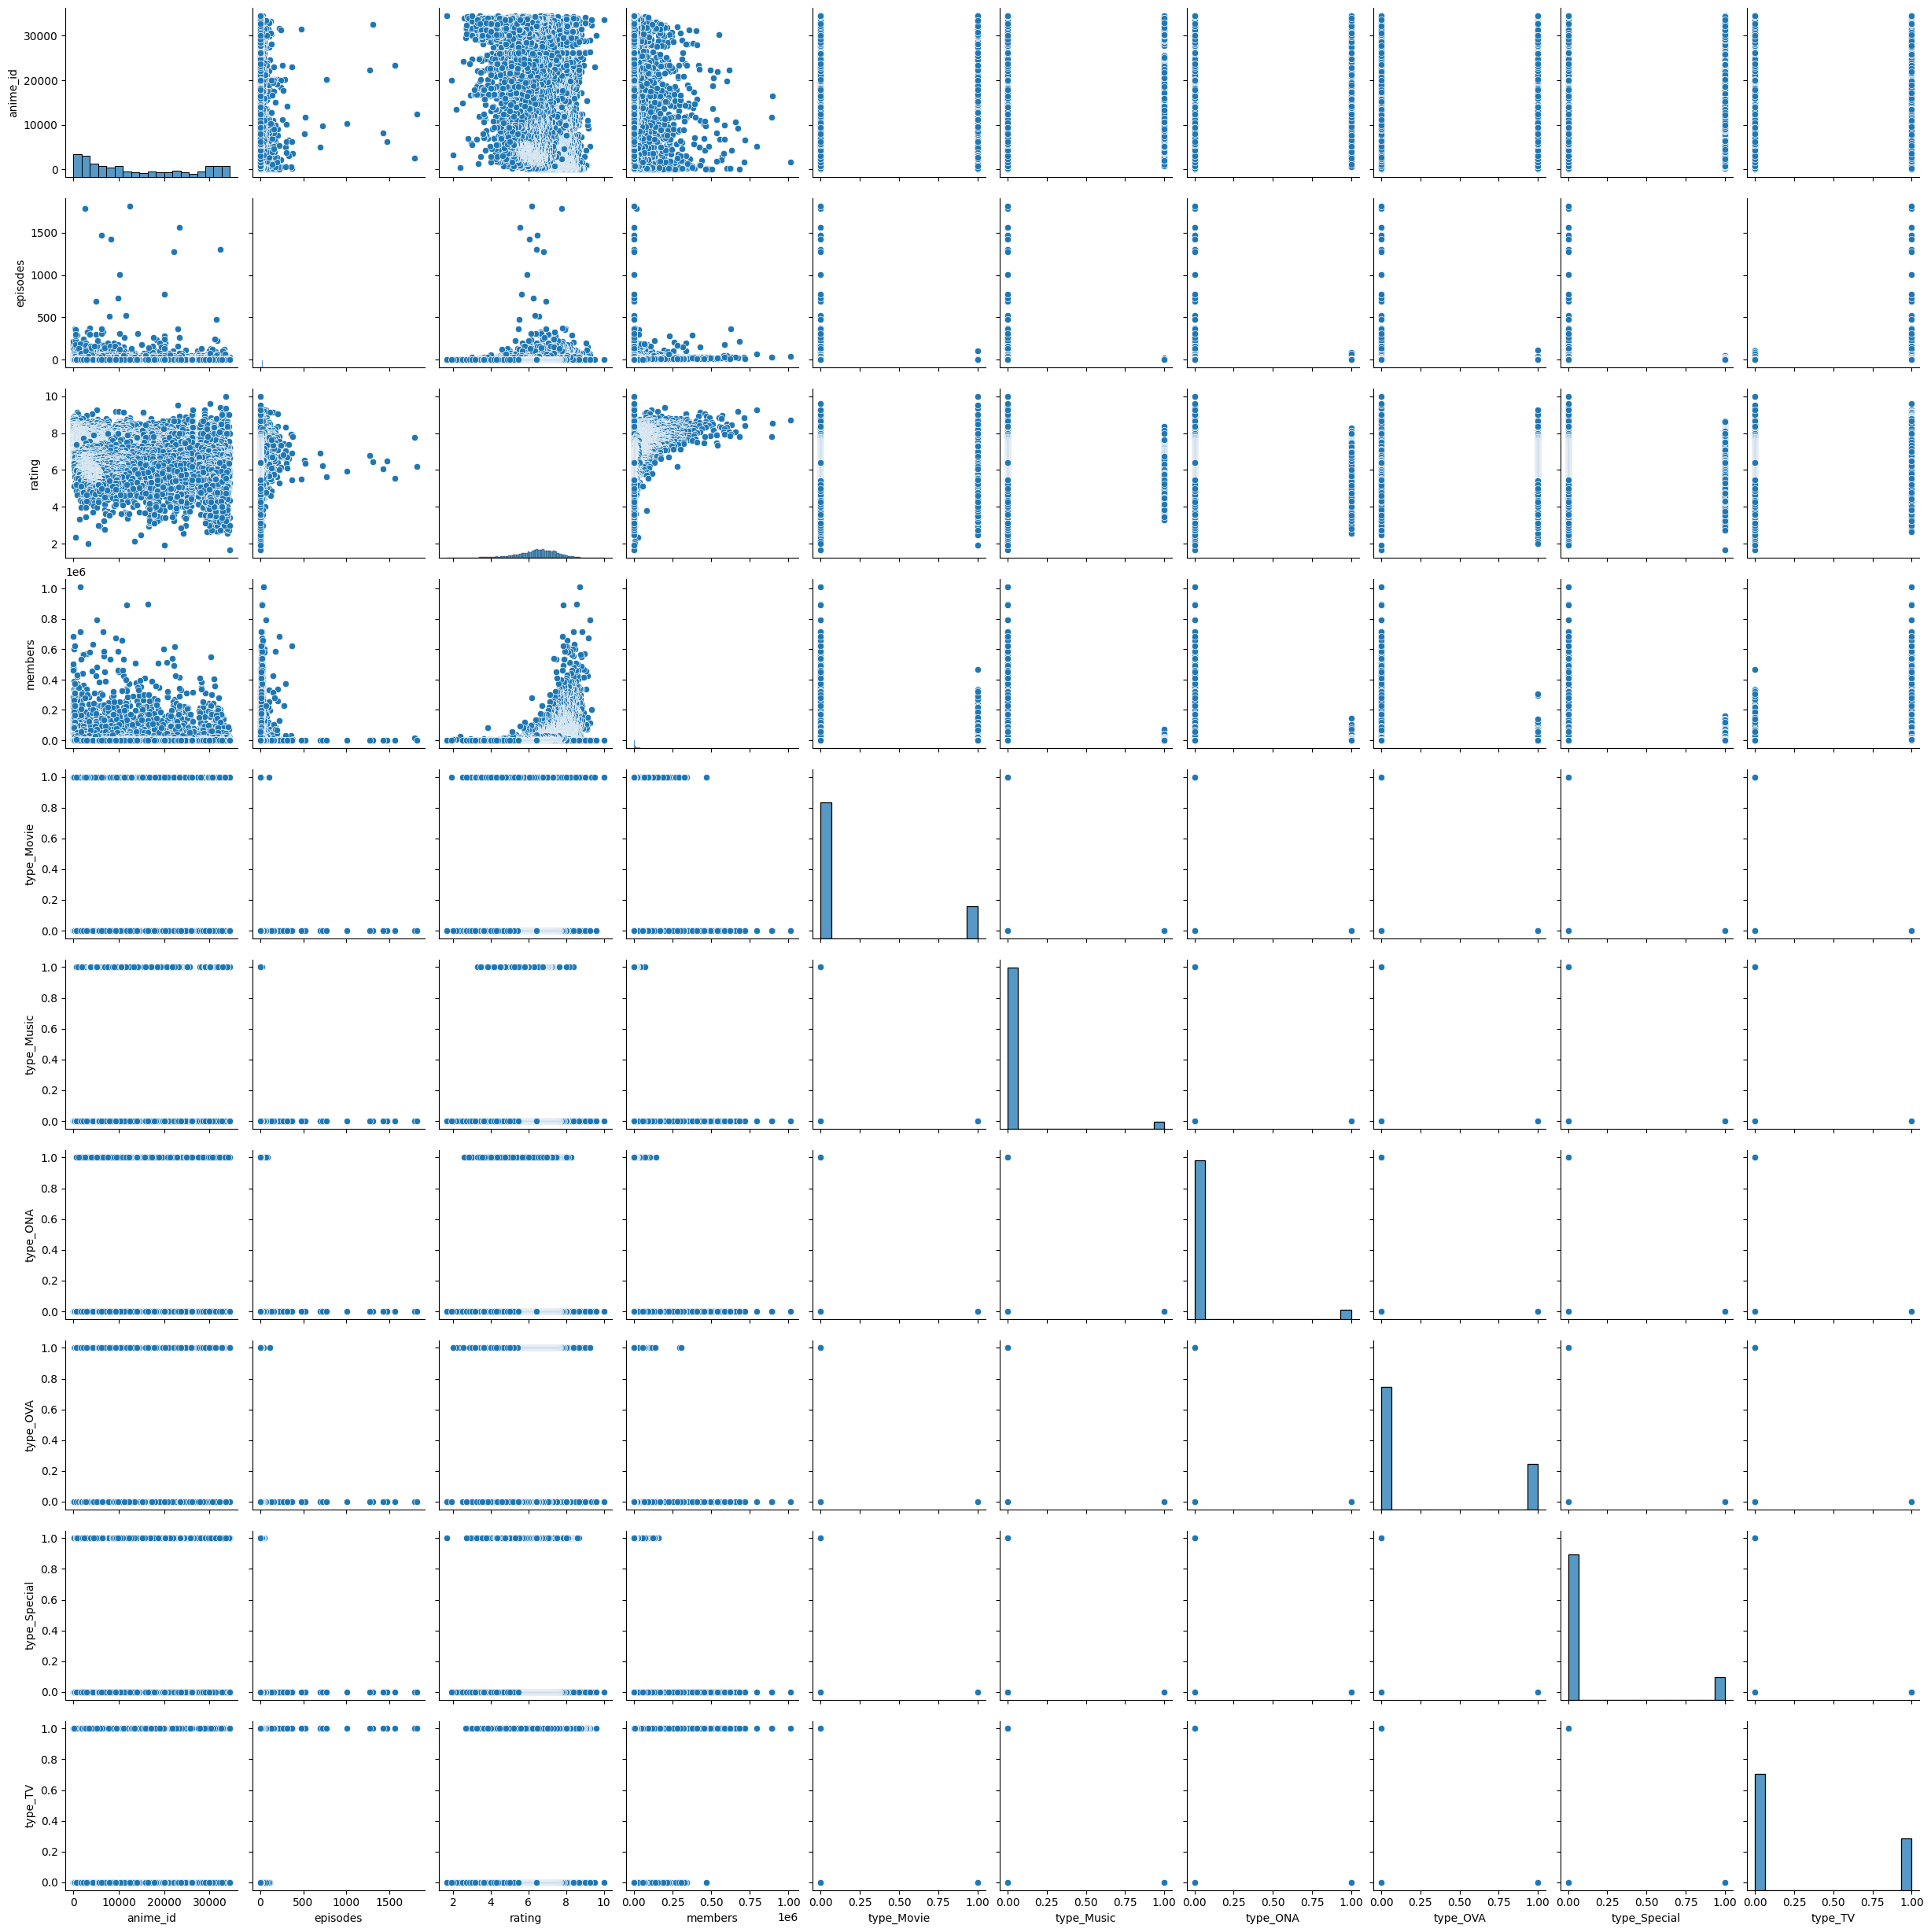

In [67]:
sns.pairplot(data=anime)

In [80]:
anime_df =anime.pivot(index='anime_id',columns='episodes',values='rating')

In [81]:
anime_df

episodes,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,726.0,773.0,1006.0,1274.0,1306.0,1428.0,1471.0,1565.0,1787.0,1818.0
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#Impute those NaNs with 0 values
anime_df.fillna(0, inplace=True)

In [83]:
anime_df

episodes,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,726.0,773.0,1006.0,1274.0,1306.0,1428.0,1471.0,1565.0,1787.0,1818.0
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [85]:
user_sim = 1 - pairwise_distances(anime_df.values,metric='cosine')

In [86]:
user_sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [87]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [88]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
#Set the index and column names to user ids
user_sim_df.index = anime.anime_id.unique()
user_sim_df.columns = anime.anime_id.unique()

In [96]:
user_sim_df

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
32281,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
np.fill_diagonal(user_sim,0)
user_sim_df.iloc[0:5, 0:5]

,32281,5114,28977,9253,9969
32281,0.0,0.0,1.0,1.0,0.0
5114,0.0,0.0,0.0,0.0,0.0
28977,1.0,0.0,0.0,1.0,0.0
9253,1.0,0.0,1.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,0.0


In [98]:
user_sim_df

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
32281,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:40]

32281    28977
5114        44
28977    32281
9253     32281
9969       820
32935    32281
11061    15335
820       9969
15335    11061
15417    32182
4181     32281
28851       30
918      25439
2904     19647
28891    32281
199      11061
23273     4789
24701    11061
12355     1929
1575     32281
263      32281
44        5114
1         5114
30276     7785
164       5114
7311     10165
17074    16982
21939     5114
457       5114
2001     32281
245       6945
32983    11061
5258     28805
28957    32281
11665    11061
431       5114
11741    32281
31757     6114
19       32281
12365    32281
dtype: int64

In [101]:
anime[(anime['anime_id']==1) | (anime['anime_id']==5114)]

,anime_id,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
1,5114,64.0,9.26,793665,0,0,0,0,0,1
22,1,26.0,8.82,486824,0,0,0,0,0,1
